# Submission Proyek Akhir : Klasifikasi Gambar Hewan Peliharaan (Pet)
- Data set yang dipakai : https://drive.google.com/drive/folders/1pa3AbIkNY0RfmECdr3Pi78Kl4UxrIFRB?usp=drive_link

# Proyek Klasifikasi Gambar Pet
- **Nama:** [Farchan Suryadio Rizki]
- **Email:** [farchandio@student.ub.ac.id]
- **ID Dicoding:** [farchandio]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.model_selection import train_test_split
import zipfile,os
import numpy as np
import pandas as pd
from google.colab import files
from keras.preprocessing import image
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
'''mengatur seed untuk generate random number'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

##  🚀 Import Library
- ✅ import tensorflow as tf: mengimpor modul TensorFlow yang diperlukan untuk pengembangan model deep learning

- ✅ from tensorflow.keras.optimizers import RMSprop: mengimpor optimiser RMSprop untuk model keras yang digunakan untuk memperbarui bobot saat model dilatih

- ✅ from tensorflow.keras.preprocessing.image import ImageDataGenerator: mengimpor modul ImageDataGenerator untuk melakukan augmentasi data gambar dan memuat gambar secara otomatis dari direktori yang ditentukan.

- ✅ shutil: Modul ini digunakan untuk operasi file tingkat tinggi seperti menyalin dan memindahkan file atau direktori. Contoh: shutil.copy() atau shutil.move().

- ✅ train_test_split: Fungsi dari library scikit-learn yang digunakan untuk membagi dataset menjadi data latih dan data uji secara acak. Ini sangat berguna saat membuat model machine learning.

- ✅ zipfile: Digunakan untuk membaca dan mengekstrak file .zip.

- ✅ os: Modul standar Python untuk berinteraksi dengan sistem operasi, misalnya untuk mengelola file/direktori (os.listdir(), os.path.join(), dll).

- ✅ numpy: Library utama untuk komputasi numerik di Python, terutama digunakan untuk membuat dan mengelola array/matriks. Sangat penting dalam machine learning dan deep learning.

- ✅ files.upload() : Digunakan khusus di Google Colab untuk mengunggah atau mengunduh file dari/ke lokal. Contoh: files.upload() untuk mengunggah file dari komputer ke Colab.

- ✅ Modul dari Keras yang menyediakan fungsi-fungsi untuk memuat dan memproses gambar agar bisa digunakan sebagai input ke model deep learning. Contoh: image.load_img(), image.img_to_array().

- ✅ Library ini digunakan untuk mengirim permintaan HTTP seperti GET atau POST. Cocok untuk mengunduh data atau gambar dari URL

- ✅ matplotlib.pyplot: Digunakan untuk membuat grafik atau visualisasi data, seperti plt.plot() atau plt.imshow() untuk menampilkan gambar.

- ✅ matplotlib.image: Submodul dari matplotlib khusus untuk memproses gambar, misalnya mpimg.imread() untuk membaca file gambar.



# Pre-processing Data

In [ ]:
import zipfile


zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("/content/drive/MyDrive/Dicoding/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


Kode ini digunakan untuk:

- Mengekstrak file ZIP dataset ke folder /tmp.
- Menyusun path variabel base_dir dan train_dir sebagai referensi ke folder dataset.
- Mempersiapkan struktur direktori untuk proses pelatihan model machine learning.

In [ ]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('Terdapat {} file gambar.'.format(len(file_names)))

Terdapat 25000 file gambar.


In [ ]:
def to_dataframe(file_names):
    files, labels = list(), list()
    for file in file_names:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'nama_file':files, 'label':labels})
    return df

df = to_dataframe(file_names)

In [ ]:
df.head()

nama_file label
0  dog.8458.jpg   dog
1  cat.7520.jpg   cat
2   cat.444.jpg   cat
3  cat.4876.jpg   cat
4  dog.4386.jpg   dog

In [ ]:
# download dependecies split-folders
!pip install split-folders

Perintah !pip install split-folders digunakan untuk memasang library yang memudahkan proses pembagian dataset menjadi bagian pelatihan, validasi, dan pengujian secara otomatis.

## Mengekstrak dataset yang sudah di upload

Pembagian label data set  :
 label
dog    12500
cat    12500
Name: count, dtype: int64


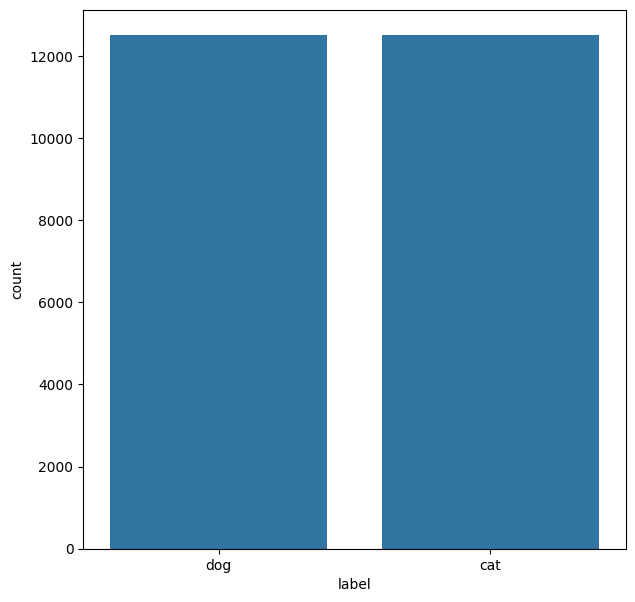

In [ ]:
import seaborn as sns
print('Pembagian label data set  :\n',df['label'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x = df['label'])
plt.show()

Kode ini digunakan untuk:

- Untuk menampilkan distribusi label dalam dataset menggunakan visualisasi dengan seaborn.

In [ ]:
cat = [file for file in file_names if file[:3]=='cat']
dog = [file for file in file_names if file[:3]=='dog']

melakukan augmentasi data pada gambar dalam dataset yang akan digunakan untuk training model.

## Split data yang telah di upload menjadi 40%
implementasi augmentasi gambar dengan ImageDataGenerator

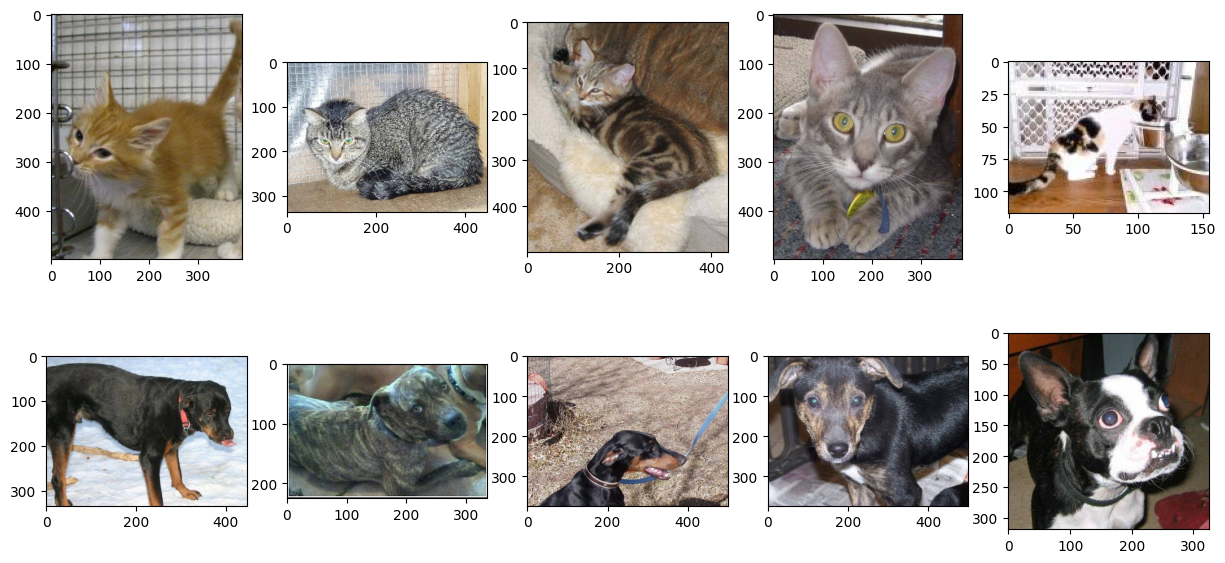

In [ ]:
import matplotlib.image as mpimg # Import the module
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0,len(cat),5), start=1):
    im = mpimg.imread('./train/'+cat[c])
    plt.subplot(2,5,i)
    plt.imshow(im)

for i, c in enumerate(np.random.randint(0,len(dog),5), start=6):
    im = mpimg.imread('./train/'+dog[c])
    plt.subplot(2,5,i)
    plt.imshow(im)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2,random_state=seed)

In [ ]:
train_set.shape, valid_set.shape

((20000, 2), (5000, 2))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH, HEIGHT = 150, 150
batch_size = 32

In [ ]:
train_datagenerator = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

training_data = train_datagenerator.flow_from_dataframe(dataframe=train_set,
                                                        directory='./train',
                                                       x_col='nama_file',
                                                       y_col='label',
                                                       target_size=(WIDTH, HEIGHT),
                                                       class_mode='categorical',
                                                       batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


Kode ini digunakan untuk membuat generator data untuk melatih dan menghitung akurasi model pada data validasi, dengan menggunakan ImageDataGenerator yang telah dibuat sebelumnya. Ini memungkinkan kita untuk memproses data gambar langsung dari direktori dan menyediakannya dalam bentuk yang dapat digunakan oleh model.

- ✅ train_datagen: Generator untuk data latih dengan augmentasi + split 60:40.
- ✅ validation_datagen: Generator untuk data validasi dengan rescaling saja, tanpa augmentasi.
- ✅ Keduanya akan digunakan untuk membaca gambar dari folder dan mengalirkannya dalam batch ke model saat training.

In [ ]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_data = valid_datagenerator.flow_from_dataframe(dataframe=valid_set,
                                                         directory='./train',
                                                         x_col='nama_file',
                                                         y_col='label',
                                                         target_size=(WIDTH,HEIGHT),
                                                         class_mode='categorical',
                                                         batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


## Menerapkan Model Sequential

In [ ]:
# Menerapkan model sequential.
from tensorflow import keras
from tensorflow.keras.layers import *
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32, kernel_size=5, input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📊 Model ini adalah arsitektur CNN standar dan cukup kuat untuk klasifikasi gambar dengan tiga kelas. Setelah ini, kamu biasanya akan melakukan:
- ✅ Kompilasi model (model.compile)
- ✅ Latih model (model.fit)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,654,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,935,714 (11.20 MB)

 Trainable params: 2,935,714 (11.20 MB)

 Non-trainable params: 0 (0.00 B)

- model.summary() → Menampilkan ringkasan model.
- model.compile(...) → Menyusun model agar siap untuk dilatih menggunakan fungsi loss dan optimizer yang sesua


🚀 digunakan untuk membagi dataset gambar ke dalam folder pelatihan (train) dan validasi (val) secara otomatis menggunakan library splitfolders.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, monitor='val_loss', min_lr=0.00001)
checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)

callbacks = [earlystop_cb, reduce_lr_cb, checkpoint_cb]

- Menetapkan dan menyimpan path-path penting dari dataset training berdasarkan kelasnya.
- Mempersiapkan struktur variabel agar mudah dipakai saat load data ke model atau analisis dataset lebih lanjut.

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

- ✅ Menyusun dan menyimpan path ke data validasi berdasarkan kelasnya (rock, paper, scissors).
- ✅ Membuat direktori yang siap digunakan untuk proses validasi model (biasanya dipakai bersama ImageDataGenerator atau metode serupa).
- ✅ Ini mempersiapkan struktur direktori yang akan digunakan dalam proses validasi saat model sedang dilatih.

In [ ]:
# membuat image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest',)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest',)

- ✅ Mempersiapkan ImageDataGenerator untuk mengolah data pelatihan dan validasi.
- ✅ Untuk pelatihan, gambar akan melalui augmentasi agar model dapat generalisasi lebih baik.
- ✅ Untuk pengujian/validasi, gambar akan dinormalisasi tetapi tidak diaugmentasi (meskipun dalam kode ini, augmentasi juga diterapkan pada data validasi).

## CNN Model Construction

In [ ]:
from tensorflow.keras.layers import *
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32, kernel_size=5, input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

✅ Kode ini digunakan untuk membuat model CNN untuk klasifikasi gambar dengan 3 kelas. Model ini terdiri dari beberapa lapisan konvolusi untuk mengekstrak fitur gambar, lapisan pooling untuk mereduksi dimensi, lapisan dropout untuk mengurangi overfitting, dan lapisan dense untuk membuat prediksi berdasarkan fitur yang dipelajari.
- ✅ CNN Layers: Untuk mengekstrak fitur dari gambar, seperti pola atau bentuk yang membantu membedakan kelas.
- ✅ MaxPooling: Mengurangi ukuran data dan mengurangi overfitting.
- ✅ Dropout: Mengurangi risiko overfitting dengan mengacak neuron selama pelatihan.
- ✅ Dense Layers: Memproses informasi yang dipelajari oleh lapisan sebelumnya dan menghasilkan prediksi akhir.

## Fungsi Compile dan Fit

In [ ]:
# Compile the model before calling model.fit()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(training_data,
                   epochs=50,
                   validation_data=validation_data,
                   validation_steps=valid_set.shape[0]//batch_size,
                   steps_per_epoch=train_set.shape[0]//batch_size,
                   callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.4980 - loss: 0.7173

625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 248ms/step - accuracy: 0.4980 - loss: 0.7173 - val_accuracy: 0.5094 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.4987 - loss: 0.6935

625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 320ms/step - accuracy: 0.4988 - loss: 0.6935 - val_accuracy: 0.5160 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5588 - loss: 0.6842

625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 249ms/step - accuracy: 0.5589 - loss: 0.6842 - val_accuracy: 0.6601 - val_loss: 0.6309 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.6516 - loss: 0.6367

625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.6517 - loss: 0.6366 - val_accuracy: 0.7264 - val_loss: 0.5499 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7169 - loss: 0.5667

625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - accuracy: 0.7170 - loss: 0.5667 - val_accuracy: 0.7302 - val_loss: 0.5428 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7616 - loss: 0.5109

625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 237ms/step - accuracy: 0.7617 - loss: 0.5109 - val_accuracy: 0.8225 - val_loss: 0.3925 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 247ms/step - accuracy: 0.7822 - loss: 0.4654 - val_accuracy: 0.8257 - val_loss: 0.3952 - learning_rate: 0.0010
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.7978 - loss: 0.4347 - val_accuracy: 0.8125 - val_loss: 0.4332 - learning_rate: 0.0010
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 337ms/step - accuracy: 0.8142 - loss: 0.4151 - val_accuracy: 0.7602 - val_loss: 0.4923 - learning_rate: 0.0010
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8253 - loss: 0.3885

625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.8253 - loss: 0.3885 - val_accuracy: 0.8658 - val_loss: 0.3046 - learning_rate: 0.0010
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8478 - loss: 0.3543

625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 243ms/step - accuracy: 0.8478 - loss: 0.3543 - val_accuracy: 0.8796 - val_loss: 0.2848 - learning_rate: 0.0010
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8541 - loss: 0.3408

625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 243ms/step - accuracy: 0.8542 - loss: 0.3407 - val_accuracy: 0.8990 - val_loss: 0.2467 - learning_rate: 0.0010
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.8641 - loss: 0.3251 - val_accuracy: 0.8964 - val_loss: 0.2513 - learning_rate: 0.0010
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 242ms/step - accuracy: 0.8655 - loss: 0.3164 - val_accuracy: 0.8922 - val_loss: 0.2536 - learning_rate: 0.0010
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 340ms/step - accuracy: 0.8729 - loss: 0.3018 - val_accuracy: 0.8534 - val_loss: 0.3418 - learning_rate: 0.0010
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 244ms/step - accuracy: 0.8807 - loss: 0.2845 - val_accuracy: 0.8942 - val_loss: 0.2653 - learning_rate: 0.0010
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 326ms/step - accuracy: 0.8760 - loss: 0.2976 - val_accuracy: 0.8261 - val_loss: 0.4080 - learning_rate: 0.0010
Epoch 18/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9

625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 248ms/step - accuracy: 0.9053 - loss: 0.2415 - val_accuracy: 0.9169 - val_loss: 0.2075 - learning_rate: 5.0000e-04
Epoch 19/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 325ms/step - accuracy: 0.9085 - loss: 0.2217 - val_accuracy: 0.9183 - val_loss: 0.2084 - learning_rate: 5.0000e-04
Epoch 20/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9098 - loss: 0.2161

625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.9098 - loss: 0.2161 - val_accuracy: 0.9217 - val_loss: 0.1996 - learning_rate: 5.0000e-04
Epoch 21/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.9165 - loss: 0.2118

625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 252ms/step - accuracy: 0.9165 - loss: 0.2118 - val_accuracy: 0.9321 - val_loss: 0.1770 - learning_rate: 5.0000e-04
Epoch 22/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.9174 - loss: 0.2100 - val_accuracy: 0.9060 - val_loss: 0.2282 - learning_rate: 5.0000e-04
Epoch 23/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.9175 - loss: 0.2047 - val_accuracy: 0.9243 - val_loss: 0.1855 - learning_rate: 5.0000e-04
Epoch 24/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9188 - loss: 0.2069

625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 247ms/step - accuracy: 0.9188 - loss: 0.2069 - val_accuracy: 0.9269 - val_loss: 0.1748 - learning_rate: 5.0000e-04
Epoch 25/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 248ms/step - accuracy: 0.9166 - loss: 0.2062 - val_accuracy: 0.9313 - val_loss: 0.1869 - learning_rate: 5.0000e-04
Epoch 26/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9222 - loss: 0.1987 - val_accuracy: 0.9149 - val_loss: 0.2444 - learning_rate: 5.0000e-04
Epoch 27/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 324ms/step - accuracy: 0.9228 - loss: 0.2015 - val_accuracy: 0.9277 - val_loss: 0.1891 - learning_rate: 5.0000e-04
Epoch 28/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 247ms/step - accuracy: 0.9224 - loss: 0.1938 - val_accuracy: 0.9313 - val_loss: 0.1885 - learning_rate: 5.0000e-04
Epoch 29/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 250ms/step - accuracy: 0.9270 - loss: 0.1914 - val_accuracy: 0.9327 - val_loss: 0.1942 - learning_rate: 5.0000e-04
Epoch 30/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 

625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.9407 - loss: 0.1555 - val_accuracy: 0.9331 - val_loss: 0.1670 - learning_rate: 2.5000e-04
Epoch 34/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 325ms/step - accuracy: 0.9403 - loss: 0.1610 - val_accuracy: 0.9315 - val_loss: 0.1762 - learning_rate: 2.5000e-04
Epoch 35/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.9402 - loss: 0.1641 - val_accuracy: 0.9355 - val_loss: 0.1759 - learning_rate: 2.5000e-04
Epoch 36/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 248ms/step - accuracy: 0.9371 - loss: 0.1565 - val_accuracy: 0.9221 - val_loss: 0.2255 - learning_rate: 2.5000e-04
Epoch 37/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9405 - loss: 0.1509 - val_accuracy: 0.9359 - val_loss: 0.1705 - learning_rate: 2.5000e-04
Epoch 38/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 247ms/step - accuracy: 0.9389 - loss: 0.1635 - val_accuracy: 0.9417 - val_loss: 0.1705 - learning_rate: 2.5000e-04
Epoch 39/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23

625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 248ms/step - accuracy: 0.9473 - loss: 0.1394 - val_accuracy: 0.9351 - val_loss: 0.1626 - learning_rate: 1.2500e-04
Epoch 40/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9460 - loss: 0.1466

625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 324ms/step - accuracy: 0.9460 - loss: 0.1466 - val_accuracy: 0.9439 - val_loss: 0.1564 - learning_rate: 1.2500e-04
Epoch 41/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 215s 249ms/step - accuracy: 0.9457 - loss: 0.1409 - val_accuracy: 0.9325 - val_loss: 0.1804 - learning_rate: 1.2500e-04
Epoch 42/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - accuracy: 0.9424 - loss: 0.1548 - val_accuracy: 0.9405 - val_loss: 0.1692 - learning_rate: 1.2500e-04
Epoch 43/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9488 - loss: 0.1344 - val_accuracy: 0.9341 - val_loss: 0.1830 - learning_rate: 1.2500e-04
Epoch 44/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 244ms/step - accuracy: 0.9492 - loss: 0.1359 - val_accuracy: 0.9395 - val_loss: 0.1610 - learning_rate: 1.2500e-04
Epoch 45/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.9482 - loss: 0.1364 - val_accuracy: 0.9425 - val_loss: 0.1723 - learning_rate: 1.2500e-04
Epoch 46/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 

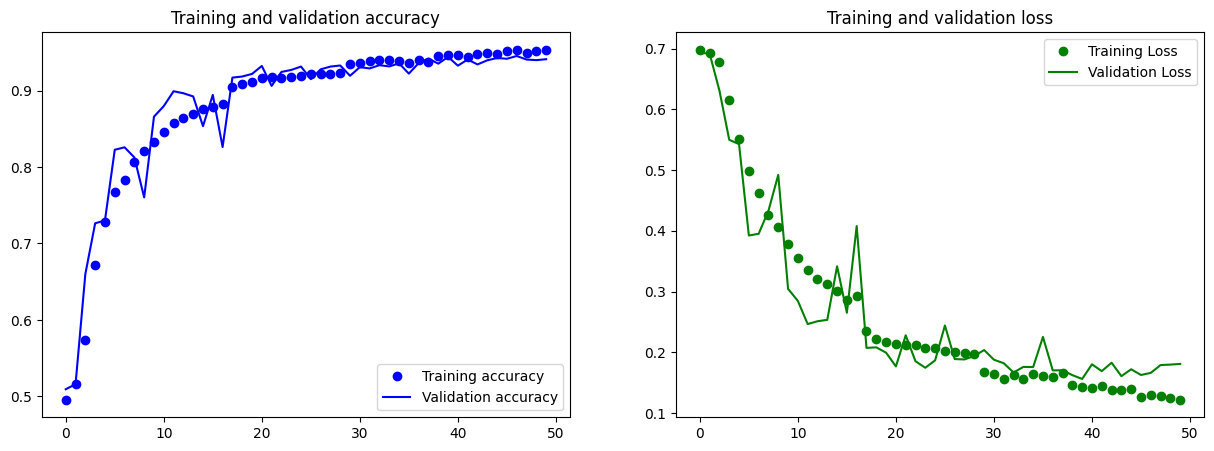

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model1 = keras.models.load_model('model.h5')

In [ ]:
test_loss, test_acc = model1.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9458 - loss: 0.1529
Loss: 0.157
Accuracy: 94.380


In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Verify file exists and path is correct
file_path = '/content/drive/MyDrive/Dicoding/sampleSubmission.csv'
import os
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"File not found at: {file_path}")
    print("Please check the file path and ensure it exists in your Google Drive.")
    # If file not found, you need to correct the file path
    # For example: file_path = '/content/drive/MyDrive/Data/Dicoding/sampleSubmission.csv'


sampleSubmission = pd.read_csv(file_path)
test_df = sampleSubmission.copy()
test_df['id'] = test_df['id'].apply(lambda x : str(x)+'.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found at: /content/drive/MyDrive/Dicoding/sampleSubmission.csv


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df,
                                                "./test1/",
                                                x_col='id',
                                                y_col=None,
                                                class_mode=None,
                                                target_size=(WIDTH,HEIGHT),
                                                batch_size=batch_size,
                                                shuffle=False)

Found 12500 validated image filenames.


In [ ]:
predict = model1.predict(test_generator, steps=int(np.ceil(test_df.shape[0]/batch_size)))

391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step


In [ ]:
sampleSubmission['label'] = np.argmax(predict, axis=-1)
sampleSubmission.to_csv('submission.csv', index=False)

In [ ]:
test_df['label'] = sampleSubmission['label'].replace({ 1: 'dog', 0: 'cat' })

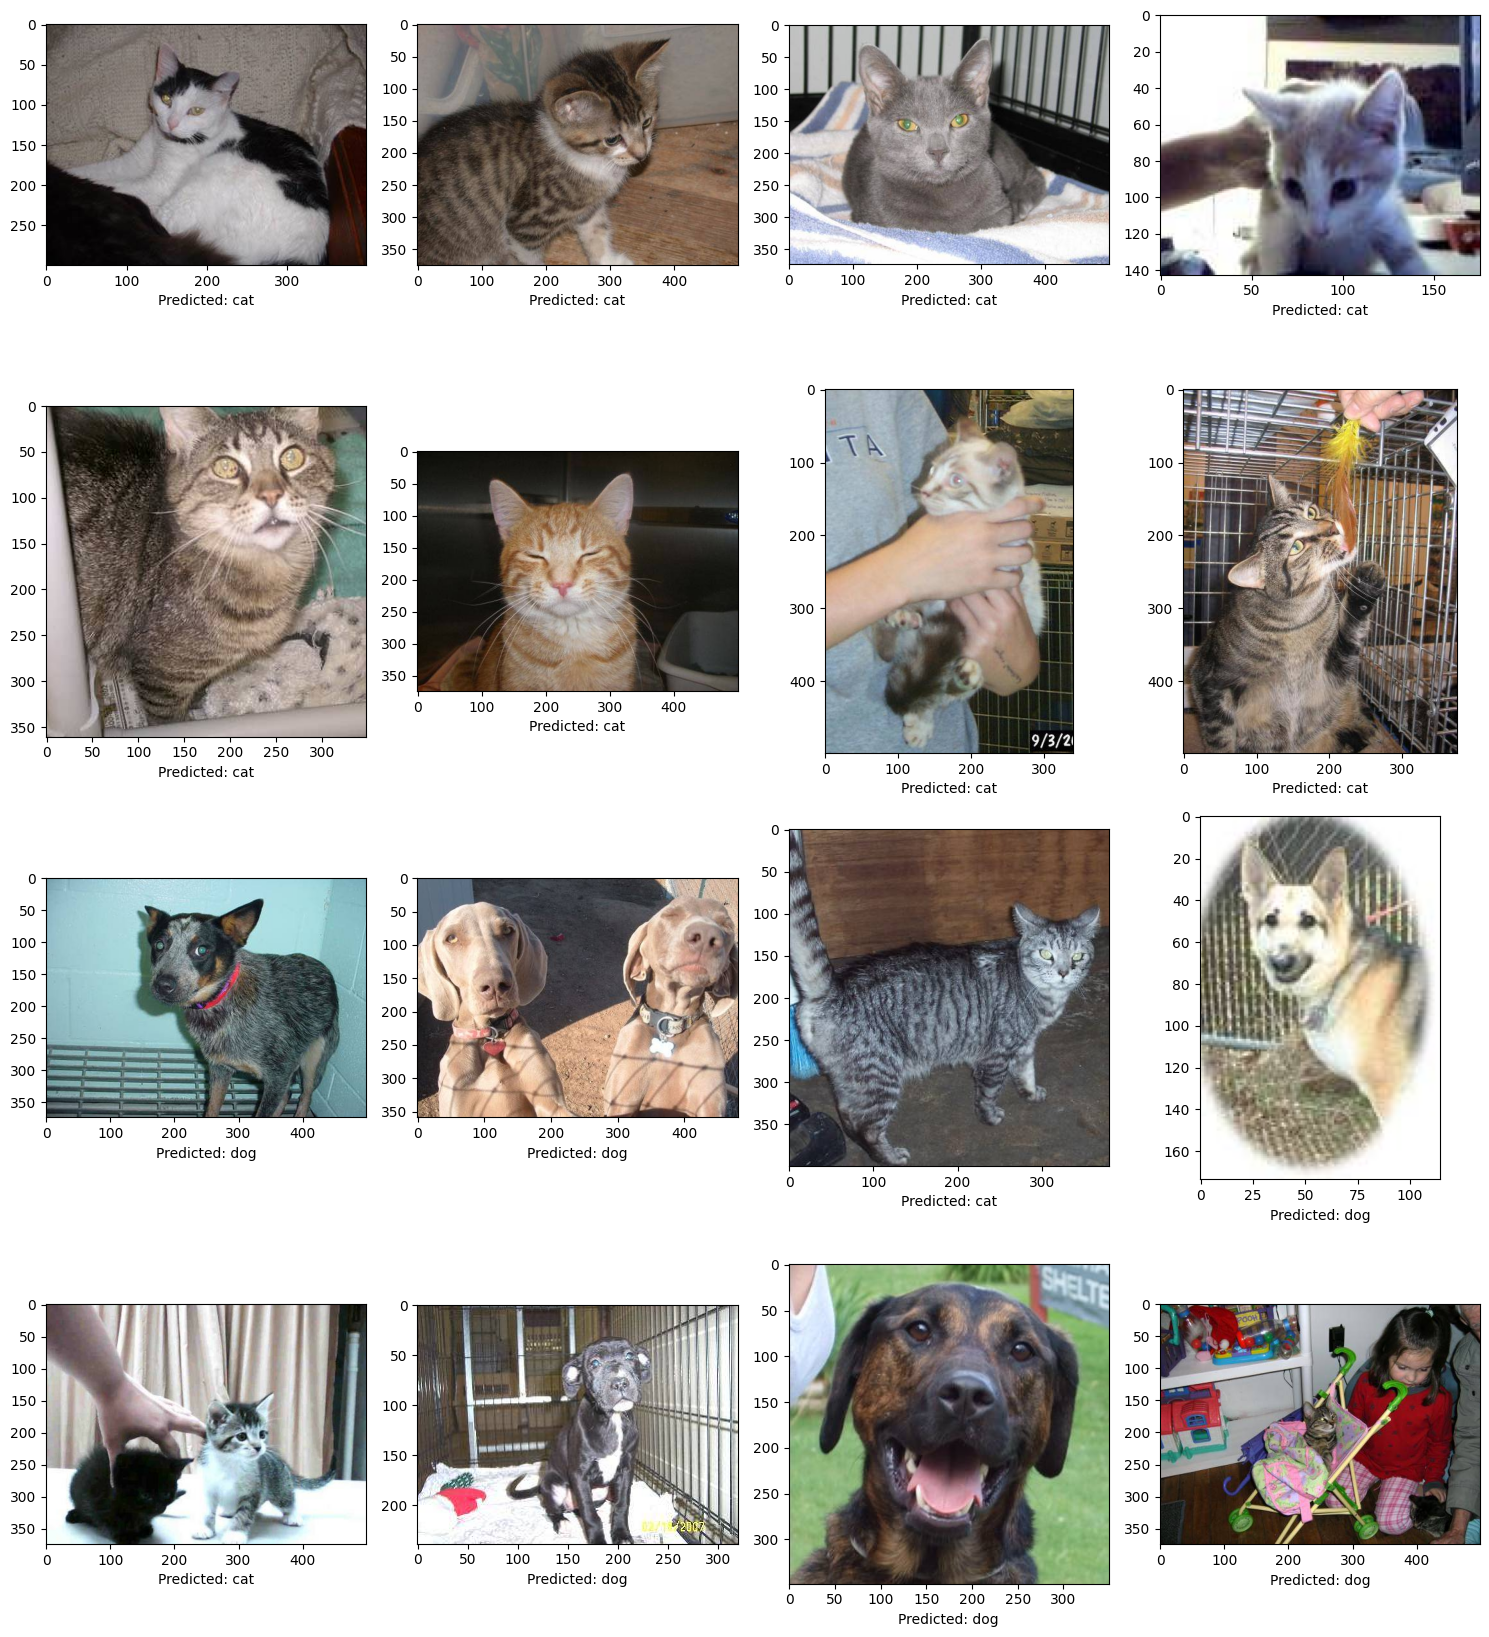

In [ ]:
sample_test = test_df.values[np.random.randint(0, len(test_df), 16)]
sample_test
plt.figure(figsize=(15, 17))
for index, row in enumerate(sample_test):
    filename = row[0]
    category = row[1]
    # Use mpimg instead of img
    image = mpimg.imread("./test1/"+filename) # Change here
    plt.subplot(4, 4, index+1)
    plt.imshow(image)
    plt.xlabel('Predicted: ' + "{}".format(category) )
plt.tight_layout()
plt.show()

Mengonfigurasi dan mengompilasi model dengan loss function categorical_crossentropy, optimizer RMS prom, dan metrik accuracy, yang semuanya sesuai untuk tugas klasifikasi gambar dengan 3 kelas.

Kode ini digunakan untuk melatih model dengan data pelatihan dan mengevaluasinya pada data validasi selama 15 epoch. Hasil pelatihan dan validasi akan ditampilkan pada setiap epoch, memungkinkan pemantauan kinerja model selama pelatiha

## Loss train dan Validation

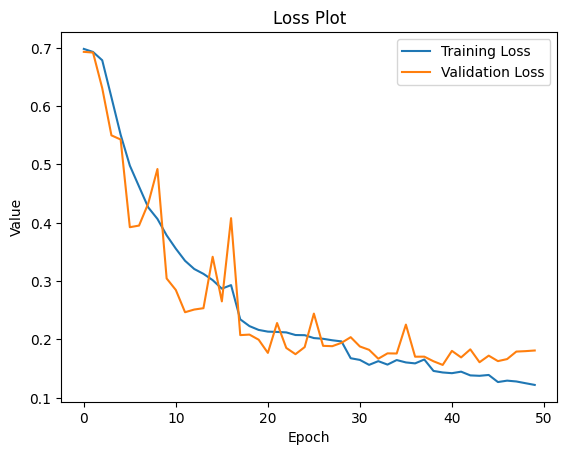

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Kode ini digunakan untuk menampilkan plot loss selama proses pelatihan model, yang mencakup training loss dan validation loss. Plot ini penting untuk mengevaluasi apakah model mengalami overfitting atau underfitting dan untuk memantau kinerjanya selama pelatihan.
- Jika training loss turun dan validation loss naik, ini bisa menjadi indikasi overfitting.
- Jika training loss dan validation loss keduanya turun, model berperforma dengan baik.

## Accuracy train dan Validation

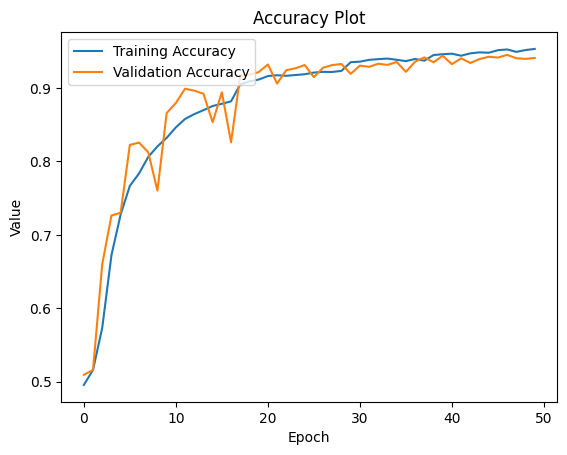

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()


⚠️ Kode ini digunakan untuk menampilkan plot yang menggambarkan perubahan akurasi selama proses pelatihan model, baik pada data pelatihan (training accuracy) maupun data validasi (validation accuracy) selama setiap epoch.
- ⚠️ Jika training accuracy naik dan validation accuracy menurun atau stagnan, ini bisa menjadi indikasi overfitting.
- ⚠️ Jika training accuracy dan validation accuracy keduanya naik, maka model berperforma dengan baik.